<a href="https://colab.research.google.com/github/reemalamri/SDA_Data_Science_Bootcamp/blob/main/Pythin_Week8_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.color_palette("deep")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
from matplotlib import style
plt.style.use('ggplot')
import sqlite3
import requests
from wordcloud import WordCloud
plt.style.use('seaborn-deep')


In [ ]:
#read data from csv file
DA_Jobs= pd.read_csv("/content/DataAnalyst.csv")

In [ ]:
#show first 5 rows 
DA_Jobs.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
#count null values in each columns
DA_Jobs.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [ ]:
#replace -1 to null
DA_Jobs=DA_Jobs.replace(["-1",-1,"Unknown"],np.NaN)

In [ ]:
DA_Jobs.isnull().sum()

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  205
Founded               660
Type of ownership     179
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [ ]:


#drop columns that have a lot of null and we not need it.
DA_Jobs=DA_Jobs.drop(["Easy Apply","Competitors","Founded"],axis=1)

In [ ]:
#drop row with null values
DA_Jobs=DA_Jobs.dropna()
#number of rows and columns
DA_Jobs.shape

(1844, 13)

In [ ]:
#columns information
DA_Jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1844 non-null   int64  
 1   Job Title          1844 non-null   object 
 2   Salary Estimate    1844 non-null   object 
 3   Job Description    1844 non-null   object 
 4   Rating             1844 non-null   float64
 5   Company Name       1844 non-null   object 
 6   Location           1844 non-null   object 
 7   Headquarters       1844 non-null   object 
 8   Size               1844 non-null   object 
 9   Type of ownership  1844 non-null   object 
 10  Industry           1844 non-null   object 
 11  Sector             1844 non-null   object 
 12  Revenue            1844 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 201.7+ KB


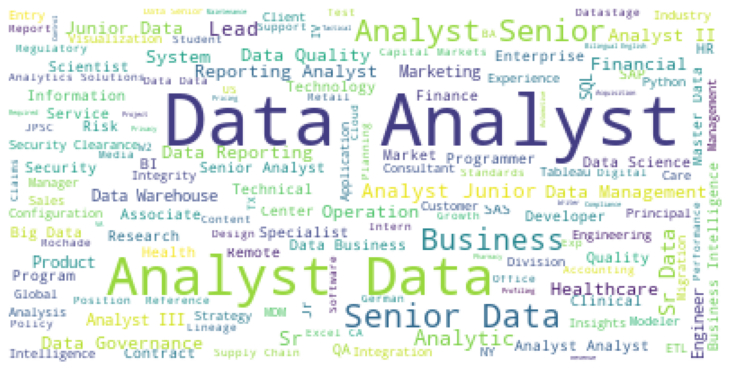

In [ ]:
plt.figure(figsize=(10,10))
positions_text = " ".join(DA_Jobs['Job Title'].to_list())
wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white").generate(positions_text)
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
#top 150 frequent keywords in job title

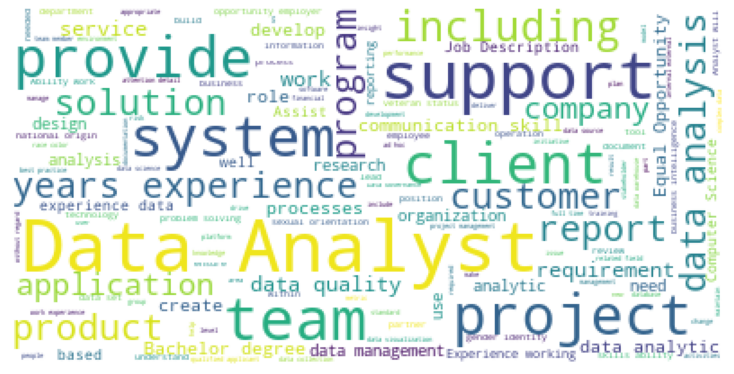

In [ ]:
plt.figure(figsize=(10,10))
positions_text = " ".join(DA_Jobs['Job Description'].to_list())
wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white").generate(positions_text)
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
#top 150 frequent keywords in Job Description

In [ ]:
#convert all text to lowercase
DA_Jobs["Job Description"]= DA_Jobs["Job Description"].str.lower()

In [ ]:
#set with some keywords skills
skills_keywords = {'python','r','sql','excel','tableau','power-bi',
             'statistics','machine-learning', 'data-visualization','business-intelligence'}

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = skills_keywords.intersection(Description_words) #returns a set that contains the similarity between Description_words and skills_keywords 
    return ' '.join( match_words)
   
def split_line(in_line):
    line_sp = in_line.split(" ")
    line_two = ["-".join(line_sp[i:i + 2]) for i in range(0, len(line_sp), 2)]
    match_word = skills_keywords.intersection(line_two)
    return ' '.join( match_word)

DA_Jobs['DA_Skills'] =  DA_Jobs["Job Description"].apply(word_finder) #creat new columns have skills keywords
DA_Jobs['DA_Skills'] = DA_Jobs['DA_Skills'] +" "+ DA_Jobs["Job Description"].apply(split_line) 

DA_Jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql


In [ ]:

count_skills= pd.Series(' '.join(DA_Jobs['DA_Skills']).split(" ")).value_counts()#new series that count every skills 
count_skills=count_skills.drop([''], axis=0)
count_skills

sql                      714
excel                    360
python                   213
tableau                  199
statistics               193
business-intelligence    124
r                        108
data-visualization        98
machine-learning          68
power-bi                  39
dtype: int64

Text(0, 0.5, ' ')

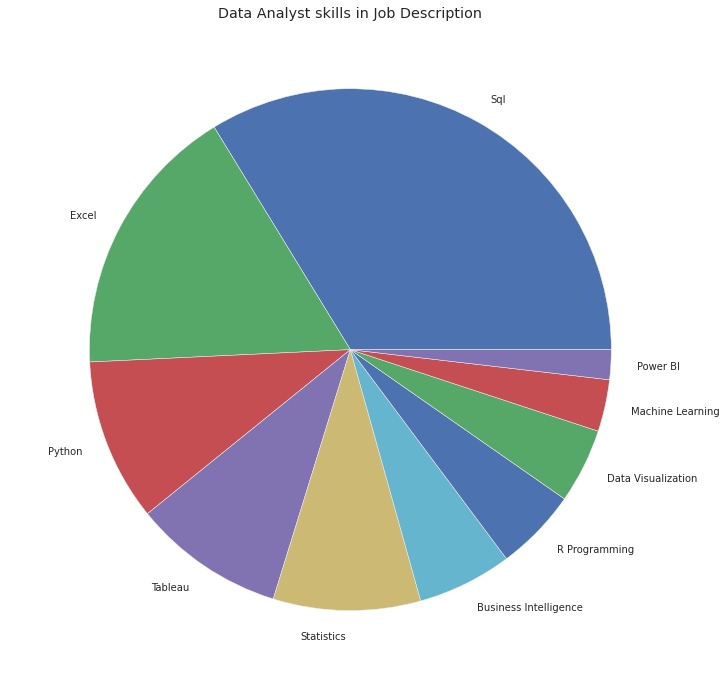

In [ ]:
plt.figure(figsize=(12,12))
                    
labels = ['Sql','Excel','Python', 'Tableau', 'Statistics','Business Intelligence','R Programming ','Data Visualization ','Machine Learning',
          'Power BI ']# list of skills name
count_skills.plot.pie(title="Data Analyst skills in Job Description",labels=labels) # plot pie chart with skills name
plt.ylabel(' ')


In [ ]:
DA_Jobs[['min_Salary','max_Salary']] = DA_Jobs["Salary Estimate"].str.split("-",expand=True,)#split range of salary to minimums and maxmums

DA_Jobs['min_Salary']=DA_Jobs['min_Salary'].str.extract('(\d+)') #extract the number only
DA_Jobs['max_Salary']=DA_Jobs['max_Salary'].str.extract('(\d+)')

DA_Jobs["min_Salary"] = pd.to_numeric(DA_Jobs["min_Salary"])*1000 #convert to number then convert salarys to thousand 
DA_Jobs["max_Salary"] = pd.to_numeric(DA_Jobs["max_Salary"])*1000

DA_Jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql,37000,66000


In [ ]:
DA_Jobs[['min_Size','max_Size']] = DA_Jobs["Size"].str.split("to",expand=True,) #split range of size company to minimums and maxmums

DA_Jobs['min_Size']=DA_Jobs['min_Size'].str.extract('(\d+)') #extract the number only
DA_Jobs['max_Size']=DA_Jobs['max_Size'].str.extract('(\d+)')

DA_Jobs['min_Size']=pd.to_numeric(DA_Jobs['min_Size']) #convert to number
DA_Jobs['max_Size']=pd.to_numeric(DA_Jobs['max_Size'])

DA_Jobs[['min_Revenue','max_Revenue']] = DA_Jobs["Revenue"].str.split("to",expand=True,)#split range of revenue of company to minimums and maxmums

DA_Jobs['min_Revenue']= DA_Jobs['min_Revenue'].str.extract('(\d+)')#extract the number only
DA_Jobs['max_Revenue']= DA_Jobs['max_Revenue'].str.extract('(\d+)')

DA_Jobs['min_Revenue']= pd.to_numeric(DA_Jobs['min_Revenue']) #convert to number
DA_Jobs['max_Revenue']= pd.to_numeric(DA_Jobs['max_Revenue'])

In [ ]:
DA_Jobs["Salary_Avg"]=((DA_Jobs["min_Salary"]+DA_Jobs["max_Salary"])/2)
DA_Jobs.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,NaN,2.0,5.0,51500.0


In [ ]:
sector_DFt=pd.DataFrame()
sector_DFt=DA_Jobs[["Sector","Salary_Avg"]].copy().reset_index()# copy the columns from DA_Jobs 
sector_DFt['Counts'] = sector_DFt.groupby(['Sector'])['Salary_Avg'].transform('count') 
sector_DFt=sector_DFt.groupby('Sector').agg({'Salary_Avg':'mean','Counts':'mean'})# calculate mean for salary_avg and count
sector_DFt=sector_DFt.sort_values("Counts",ascending=False).iloc[:10] # top 10 of sector
sector_DFt['Sector'] = sector_DFt.index

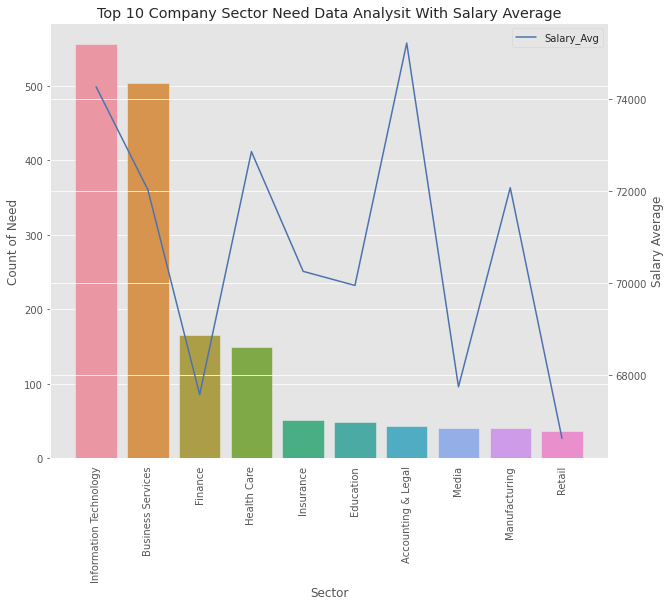

In [ ]:
plt.figure(figsize =(10,8))
ax = sns.barplot(x='Sector', y='Counts', data=sector_DFt)
plt.ylabel('Count of Need')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), sector_DFt.Salary_Avg,label="Salary_Avg")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("top 10 company sector need data analysit with Salary Average".title())
plt.ylabel('Salary Average')
plt.legend()
#plt.xticks(rotation=50)
plt.show()

In [ ]:
DA_Jobs['Regions'] = DA_Jobs["Location"].str[-2:]#take ragions code from location columns 


In [ ]:
DA_Jobs.loc[DA_Jobs['max_Size'].isnull(),'max_Size'] = DA_Jobs['min_Size']# if there no max size take from min_size


Text(0.5, 1.0, 'Ownership Types And Regions For Top 40 Salary ')

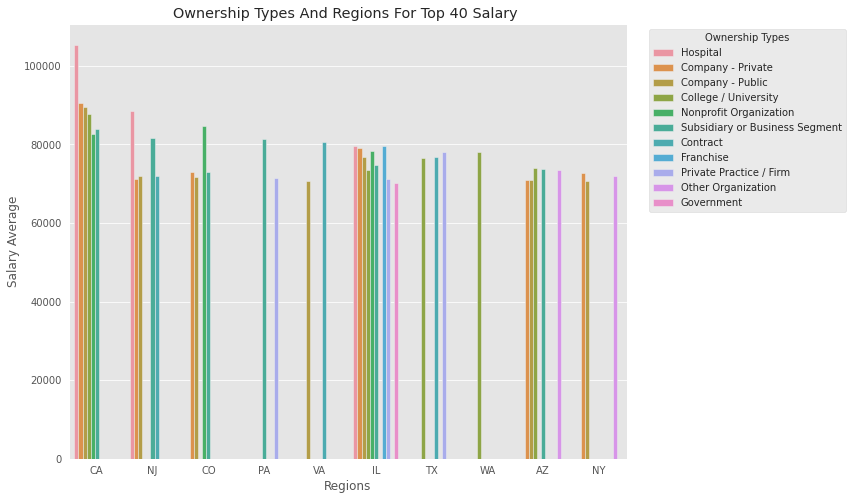

In [ ]:
plt.figure(figsize=(10,8))
data=DA_Jobs.groupby(["Regions","Type of ownership"]).agg({'Salary_Avg':'mean'}).reset_index()# new datafame with mean Salary_Avg
data=data.sort_values("Salary_Avg",ascending=False).iloc[:40]# top 40 Type of ownership have high Salary_Avg


scatter=sns.barplot(
    data=data,
     x="Regions",
     y="Salary_Avg",
     hue="Type of ownership",    
)
scatter.legend(bbox_to_anchor= (1.03, 1),
               title="ownership Types".title(),)
plt.ylabel("Salary Average")
plt.title("ownership types and Regions for top 40 Salary ".title())


In [ ]:
Revenue_units = {'billion','million',"Unknown"} # set of units of Revenue company

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = Revenue_units.intersection(Description_words)#returns a set that contains the similarity between Description_words and skills_keywords
    for x in match_words:
      return x

DA_Jobs['min_unit'] = DA_Jobs["Revenue"].apply(word_finder) #creat new columns have skills keywords



In [ ]:
DA_Jobs['Revenue-Range'] = pd.cut(x=DA_Jobs['min_Revenue'], bins=[0,10,50,100,500])#categorie min_Revenue 
DA_Jobs['Revenue-Range']= DA_Jobs['Revenue-Range'].astype(str) +" "+ DA_Jobs['min_unit']#to save unit with Revenue-Range


Text(0.5, 1.0, 'The Relation Between Number Of Employees And Salary Average In The Companys')

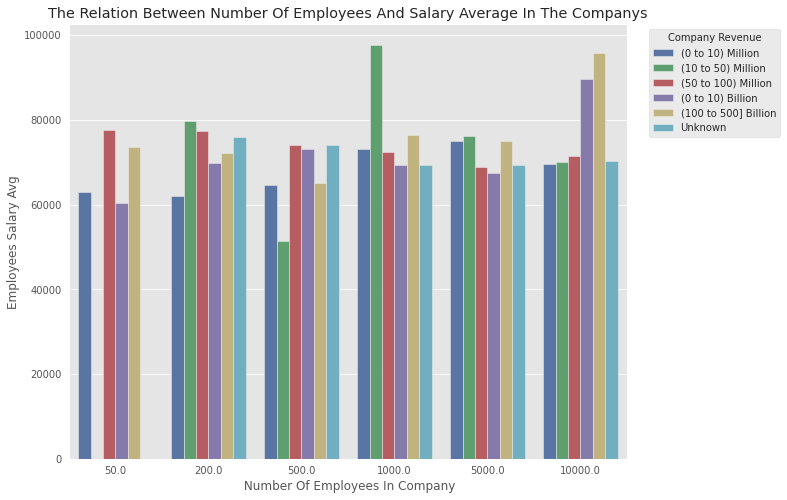

In [ ]:
plt.figure(figsize=(10,8))
labels=['(0 to 10) Million', '(10 to 50) Million','(50 to 100) Million','(0 to 10) Billion','(100 to 500] Billion', 'Unknown'] #name of labels for chart

ax=sns.barplot(
    data=DA_Jobs,
     x="max_Size",
     y="Salary_Avg",
     hue="Revenue-Range",
     ci=None,
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="company Revenue".title(),loc='upper left',bbox_to_anchor= (1.03, 1))
ax.set_ylabel("employees Salary Avg".title())
ax.set_xlabel(" number of employees in Company".title())
ax.set_title("the relation between number of employees and Salary Average in the companys".title())

In [ ]:
# count number of skills and save it in DA_Skills_rate
list_text = list(DA_Jobs['DA_Skills'].str.split(" "))
DA_Jobs['DA_Skills_rate']=list_text
DA_Jobs

#count number of skills inside evry row
for index, item in enumerate(list_text):
  list_text[index]=len(item)

DA_Jobs['DA_Skills_rate']=list_text
DA_Jobs.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg,Regions,min_unit,Revenue-Range,DA_Skills_rate
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0,NY,million,"(50.0, 100.0] million",3
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,10000.0,2.0,5.0,51500.0,NY,billion,"(0.0, 10.0] billion",4


In [ ]:
DA_Jobs['DA_Skills_rate'].unique()

array([3, 4, 2, 5, 6])

In [ ]:
DA_Jobs['DA_Skills_rate'] = pd.cut(x=DA_Jobs['DA_Skills_rate'], bins=[0,3,5,8])#categorie DA_Skills_rate


<Figure size 720x720 with 0 Axes>

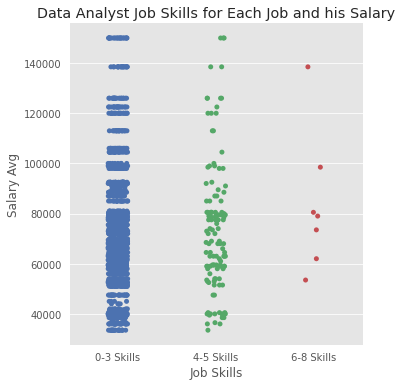

In [ ]:
plt.figure(figsize=(10,10))
labels=['0-3 Skills','4-5 Skills','6-8 Skills']
ax1=sns.catplot(x="DA_Skills_rate", y="Salary_Avg", data=DA_Jobs)
ax1.set_xticklabels(labels, minor=False)
plt.title("Data Analyst Job Skills for Each Job and his Salary")
plt.xlabel("job skills".title())
plt.ylabel("Salary Avg")
plt.show()


In [ ]:
major_keywords = {'computer-science','data-science','information-systems','business-administration','math'}

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = major_keywords.intersection(Description_words) #returns a set that contains the similarity between Description_words and skills_keywords 
    return ' '.join( match_words)

#function match 2 words
def split_line(in_line):
    line_sp = in_line.split(" ")
    line_two = ["-".join(line_sp[i:i + 2]) for i in range(0, len(line_sp), 2)]
    match_word = major_keywords.intersection(line_two)
    return ' '.join( match_word)

DA_Jobs['DA_Major'] =  DA_Jobs["Job Description"].apply(word_finder) #creat new columns have skills keywords
DA_Jobs['DA_Major'] = DA_Jobs['DA_Major'] +" "+ DA_Jobs["Job Description"].apply(split_line) 

DA_Jobs.head(3)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg,Regions,min_unit,Revenue-Range,DA_Skills_rate,DA_Major
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0,NY,million,"(50.0, 100.0] million","(0, 3]",
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,10000.0,2.0,5.0,51500.0,NY,billion,"(0.0, 10.0] billion","(3, 5]",
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql,37000,66000,1001,5000.0,NaN,NaN,51500.0,NY,Unknown,nan Unknown,"(0, 3]",


In [ ]:
count_majors= pd.Series(' '.join(DA_Jobs['DA_Major']).split(" ")).value_counts()#new series that count every skills 
count_majors

                           3433
computer-science            116
data-science                 84
information-systems          30
math                         24
business-administration       7
dtype: int64

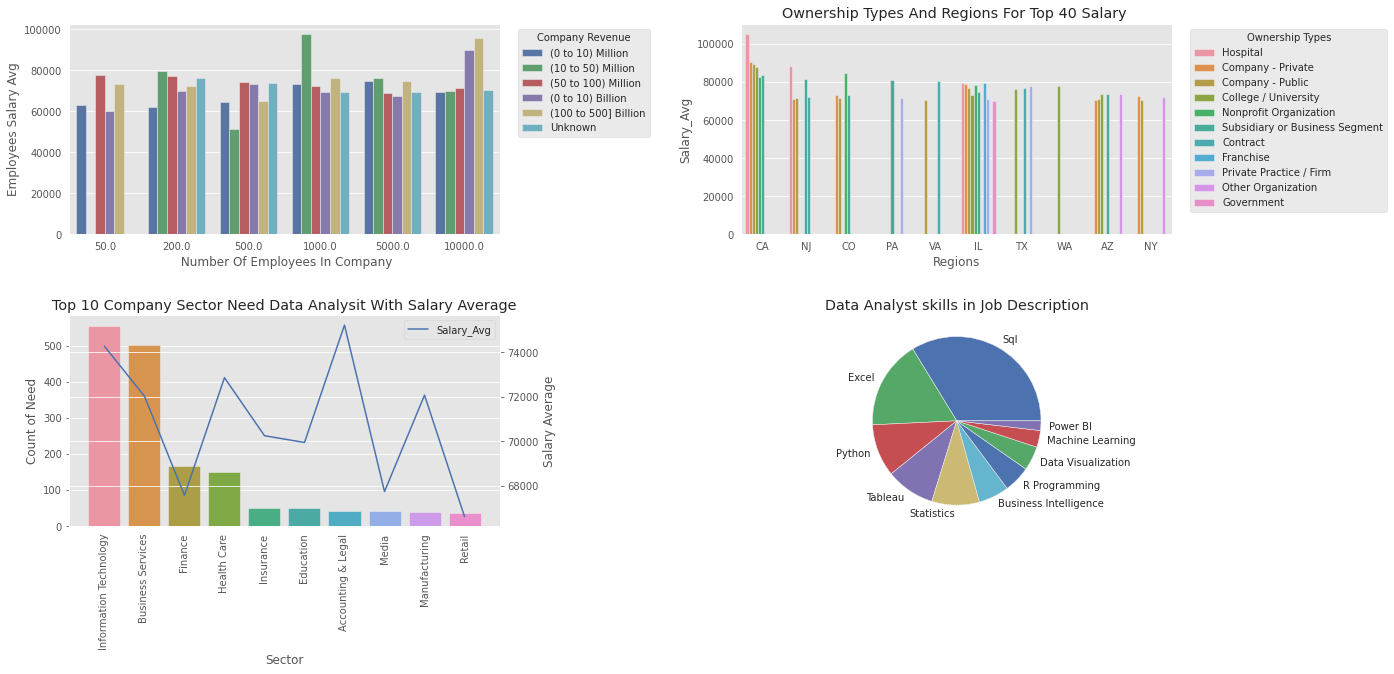

In [ ]:
fig = plt.figure(figsize=(20,10))

#  subplot #1
plt.subplot(221)
labels=['(0 to 10) Million', '(10 to 50) Million','(50 to 100) Million','(0 to 10) Billion','(100 to 500] Billion', 'Unknown']
ax=sns.barplot(
    data=DA_Jobs,
     x="max_Size",
     y="Salary_Avg",
     hue="Revenue-Range",
     ci=None,
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="company Revenue".title(),loc='upper left',bbox_to_anchor= (1.03, 1))
ax.set_ylabel("employees Salary Avg".title())
ax.set_xlabel(" number of employees in Company".title())
fig.tight_layout(pad=3.0)



#  subplot #2
plt.subplot(222)
data=DA_Jobs.groupby(["Regions","Type of ownership"]).agg({'Salary_Avg':'mean'}).reset_index()
#data=DA_Jobs.groupby(["Regions","Type of ownership"]).mean()["Salary_Avg"].reset_index()
data=data.sort_values("Salary_Avg",ascending=False).iloc[:40]
scatter=sns.barplot(
    data=data,
     x="Regions",
     y="Salary_Avg",
     hue="Type of ownership",    
)
scatter.legend(bbox_to_anchor= (1.03, 1),
               title="ownership Types".title(),)
plt.title("ownership types and Regions for top 40 Salary ".title())
fig.tight_layout(pad=3.0)


#  subplot #3
plt.subplot(223)
ax = sns.barplot(x='Sector', y='Counts', data=sector_DFt)
plt.ylabel('Count of Need')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), sector_DFt.Salary_Avg,label="Salary_Avg")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("top 10 company sector need data analysit with Salary Average".title())
plt.ylabel('Salary Average')
plt.legend()
fig.tight_layout(pad=3.0)

#  subplot #4
plt.subplot(224)
                    
labels = ['Sql','Excel','Python', 'Tableau', 'Statistics','Business Intelligence','R Programming ','Data Visualization ','Machine Learning',
          'Power BI ']
count_skills.plot.pie(title="Data Analyst skills in Job Description",labels=labels)
plt.ylabel(' ')

plt.show()

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.color_palette("deep")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
from matplotlib import style
plt.style.use('ggplot')
import sqlite3
import requests
from wordcloud import WordCloud
plt.style.use('seaborn-deep')


In [ ]:
#read data from csv file
DA_Jobs= pd.read_csv("/content/DataAnalyst.csv")

In [ ]:
#show first 5 rows 
DA_Jobs.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
#count null values in each columns
DA_Jobs.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [ ]:
#replace -1 to null
DA_Jobs=DA_Jobs.replace(["-1",-1,"Unknown"],np.NaN)

In [ ]:
DA_Jobs.isnull().sum()

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  205
Founded               660
Type of ownership     179
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [ ]:


#drop columns that have a lot of null and we not need it.
DA_Jobs=DA_Jobs.drop(["Easy Apply","Competitors","Founded"],axis=1)

In [ ]:
#drop row with null values
DA_Jobs=DA_Jobs.dropna()
#number of rows and columns
DA_Jobs.shape

(1844, 13)

In [ ]:
#columns information
DA_Jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1844 non-null   int64  
 1   Job Title          1844 non-null   object 
 2   Salary Estimate    1844 non-null   object 
 3   Job Description    1844 non-null   object 
 4   Rating             1844 non-null   float64
 5   Company Name       1844 non-null   object 
 6   Location           1844 non-null   object 
 7   Headquarters       1844 non-null   object 
 8   Size               1844 non-null   object 
 9   Type of ownership  1844 non-null   object 
 10  Industry           1844 non-null   object 
 11  Sector             1844 non-null   object 
 12  Revenue            1844 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 201.7+ KB


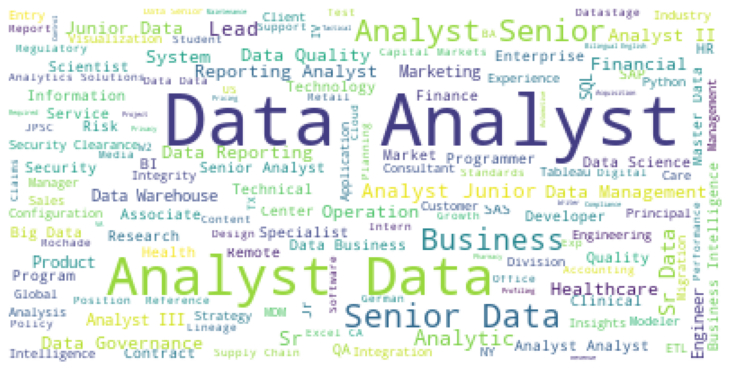

In [ ]:
plt.figure(figsize=(10,10))
positions_text = " ".join(DA_Jobs['Job Title'].to_list())
wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white").generate(positions_text)
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
#top 150 frequent keywords in job title

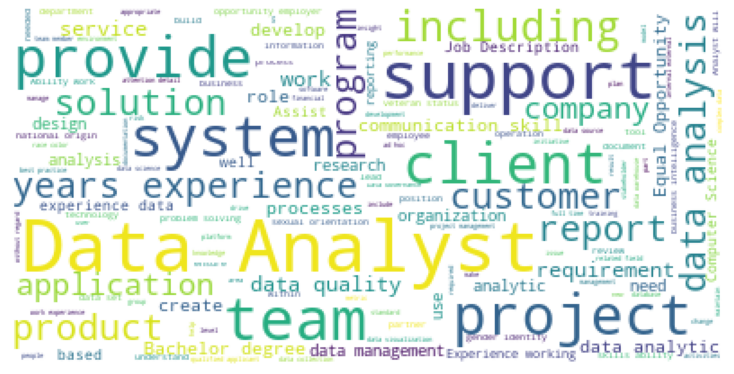

In [ ]:
plt.figure(figsize=(10,10))
positions_text = " ".join(DA_Jobs['Job Description'].to_list())
wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white").generate(positions_text)
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
#top 150 frequent keywords in Job Description

In [ ]:
#convert all text to lowercase
DA_Jobs["Job Description"]= DA_Jobs["Job Description"].str.lower()

In [ ]:
#set with some keywords skills
skills_keywords = {'python','r','sql','excel','tableau','power-bi',
             'statistics','machine-learning', 'data-visualization','business-intelligence'}

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = skills_keywords.intersection(Description_words) #returns a set that contains the similarity between Description_words and skills_keywords 
    return ' '.join( match_words)
   
def split_line(in_line):
    line_sp = in_line.split(" ")
    line_two = ["-".join(line_sp[i:i + 2]) for i in range(0, len(line_sp), 2)]
    match_word = skills_keywords.intersection(line_two)
    return ' '.join( match_word)

DA_Jobs['DA_Skills'] =  DA_Jobs["Job Description"].apply(word_finder) #creat new columns have skills keywords
DA_Jobs['DA_Skills'] = DA_Jobs['DA_Skills'] +" "+ DA_Jobs["Job Description"].apply(split_line) 

DA_Jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql


In [ ]:

count_skills= pd.Series(' '.join(DA_Jobs['DA_Skills']).split(" ")).value_counts()#new series that count every skills 
count_skills=count_skills.drop([''], axis=0)
count_skills

sql                      714
excel                    360
python                   213
tableau                  199
statistics               193
business-intelligence    124
r                        108
data-visualization        98
machine-learning          68
power-bi                  39
dtype: int64

Text(0, 0.5, ' ')

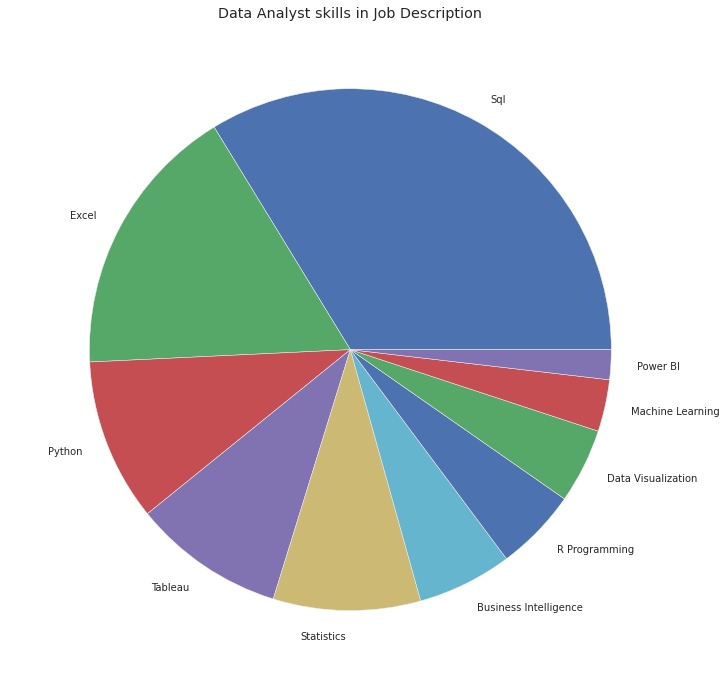

In [ ]:
plt.figure(figsize=(12,12))
                    
labels = ['Sql','Excel','Python', 'Tableau', 'Statistics','Business Intelligence','R Programming ','Data Visualization ','Machine Learning',
          'Power BI ']# list of skills name
count_skills.plot.pie(title="Data Analyst skills in Job Description",labels=labels) # plot pie chart with skills name
plt.ylabel(' ')


In [ ]:
DA_Jobs[['min_Salary','max_Salary']] = DA_Jobs["Salary Estimate"].str.split("-",expand=True,)#split range of salary to minimums and maxmums

DA_Jobs['min_Salary']=DA_Jobs['min_Salary'].str.extract('(\d+)') #extract the number only
DA_Jobs['max_Salary']=DA_Jobs['max_Salary'].str.extract('(\d+)')

DA_Jobs["min_Salary"] = pd.to_numeric(DA_Jobs["min_Salary"])*1000 #convert to number then convert salarys to thousand 
DA_Jobs["max_Salary"] = pd.to_numeric(DA_Jobs["max_Salary"])*1000

DA_Jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql,37000,66000


In [ ]:
DA_Jobs[['min_Size','max_Size']] = DA_Jobs["Size"].str.split("to",expand=True,) #split range of size company to minimums and maxmums

DA_Jobs['min_Size']=DA_Jobs['min_Size'].str.extract('(\d+)') #extract the number only
DA_Jobs['max_Size']=DA_Jobs['max_Size'].str.extract('(\d+)')

DA_Jobs['min_Size']=pd.to_numeric(DA_Jobs['min_Size']) #convert to number
DA_Jobs['max_Size']=pd.to_numeric(DA_Jobs['max_Size'])

DA_Jobs[['min_Revenue','max_Revenue']] = DA_Jobs["Revenue"].str.split("to",expand=True,)#split range of revenue of company to minimums and maxmums

DA_Jobs['min_Revenue']= DA_Jobs['min_Revenue'].str.extract('(\d+)')#extract the number only
DA_Jobs['max_Revenue']= DA_Jobs['max_Revenue'].str.extract('(\d+)')

DA_Jobs['min_Revenue']= pd.to_numeric(DA_Jobs['min_Revenue']) #convert to number
DA_Jobs['max_Revenue']= pd.to_numeric(DA_Jobs['max_Revenue'])

In [ ]:
DA_Jobs["Salary_Avg"]=((DA_Jobs["min_Salary"]+DA_Jobs["max_Salary"])/2)
DA_Jobs.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,NaN,2.0,5.0,51500.0


In [ ]:
sector_DFt=pd.DataFrame()
sector_DFt=DA_Jobs[["Sector","Salary_Avg"]].copy().reset_index()# copy the columns from DA_Jobs 
sector_DFt['Counts'] = sector_DFt.groupby(['Sector'])['Salary_Avg'].transform('count') 
sector_DFt=sector_DFt.groupby('Sector').agg({'Salary_Avg':'mean','Counts':'mean'})# calculate mean for salary_avg and count
sector_DFt=sector_DFt.sort_values("Counts",ascending=False).iloc[:10] # top 10 of sector
sector_DFt['Sector'] = sector_DFt.index

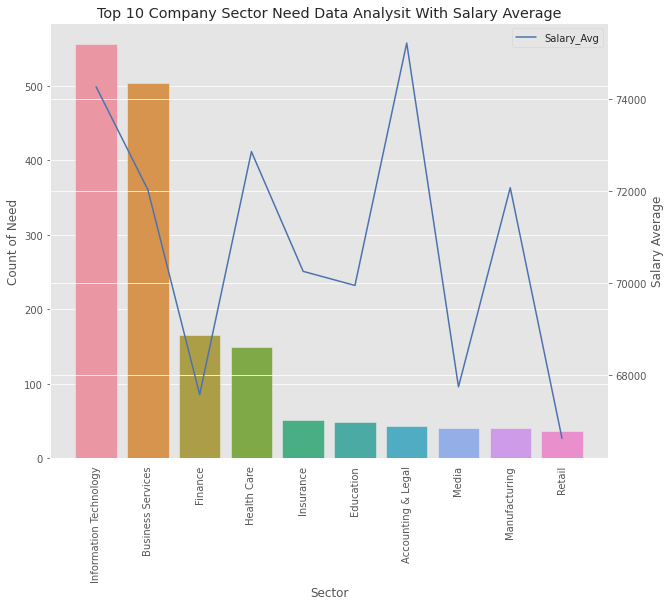

In [ ]:
plt.figure(figsize =(10,8))
ax = sns.barplot(x='Sector', y='Counts', data=sector_DFt)
plt.ylabel('Count of Need')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), sector_DFt.Salary_Avg,label="Salary_Avg")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("top 10 company sector need data analysit with Salary Average".title())
plt.ylabel('Salary Average')
plt.legend()
#plt.xticks(rotation=50)
plt.show()

In [ ]:
DA_Jobs['Regions'] = DA_Jobs["Location"].str[-2:]#take ragions code from location columns 


In [ ]:
DA_Jobs.loc[DA_Jobs['max_Size'].isnull(),'max_Size'] = DA_Jobs['min_Size']# if there no max size take from min_size


Text(0.5, 1.0, 'Ownership Types And Regions For Top 40 Salary ')

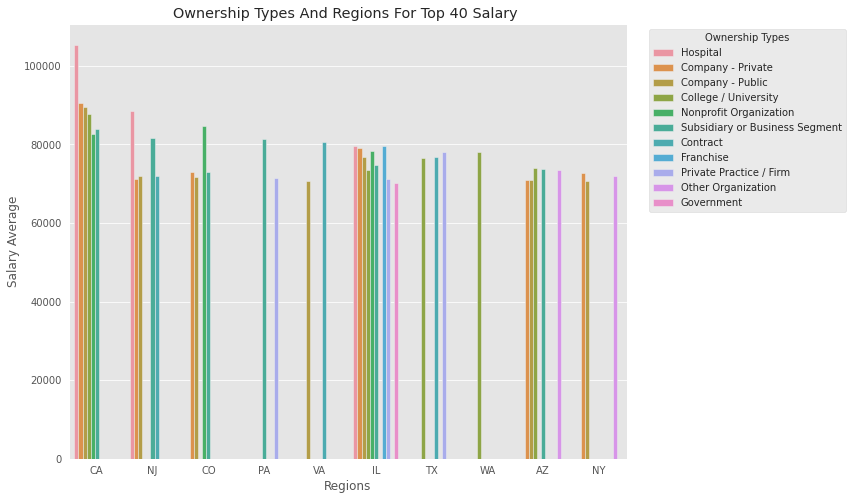

In [ ]:
plt.figure(figsize=(10,8))
data=DA_Jobs.groupby(["Regions","Type of ownership"]).agg({'Salary_Avg':'mean'}).reset_index()# new datafame with mean Salary_Avg
data=data.sort_values("Salary_Avg",ascending=False).iloc[:40]# top 40 Type of ownership have high Salary_Avg


scatter=sns.barplot(
    data=data,
     x="Regions",
     y="Salary_Avg",
     hue="Type of ownership",    
)
scatter.legend(bbox_to_anchor= (1.03, 1),
               title="ownership Types".title(),)
plt.ylabel("Salary Average")
plt.title("ownership types and Regions for top 40 Salary ".title())


In [ ]:
Revenue_units = {'billion','million',"Unknown"} # set of units of Revenue company

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = Revenue_units.intersection(Description_words)#returns a set that contains the similarity between Description_words and skills_keywords
    for x in match_words:
      return x

DA_Jobs['min_unit'] = DA_Jobs["Revenue"].apply(word_finder) #creat new columns have skills keywords



In [ ]:
DA_Jobs['Revenue-Range'] = pd.cut(x=DA_Jobs['min_Revenue'], bins=[0,10,50,100,500])#categorie min_Revenue 
DA_Jobs['Revenue-Range']= DA_Jobs['Revenue-Range'].astype(str) +" "+ DA_Jobs['min_unit']#to save unit with Revenue-Range


Text(0.5, 1.0, 'The Relation Between Number Of Employees And Salary Average In The Companys')

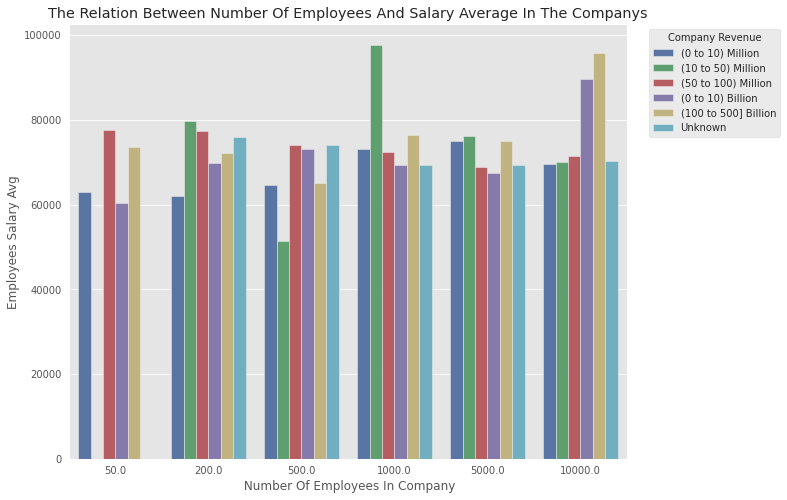

In [ ]:
plt.figure(figsize=(10,8))
labels=['(0 to 10) Million', '(10 to 50) Million','(50 to 100) Million','(0 to 10) Billion','(100 to 500] Billion', 'Unknown'] #name of labels for chart

ax=sns.barplot(
    data=DA_Jobs,
     x="max_Size",
     y="Salary_Avg",
     hue="Revenue-Range",
     ci=None,
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="company Revenue".title(),loc='upper left',bbox_to_anchor= (1.03, 1))
ax.set_ylabel("employees Salary Avg".title())
ax.set_xlabel(" number of employees in Company".title())
ax.set_title("the relation between number of employees and Salary Average in the companys".title())

In [ ]:
# count number of skills and save it in DA_Skills_rate
list_text = list(DA_Jobs['DA_Skills'].str.split(" "))
DA_Jobs['DA_Skills_rate']=list_text
DA_Jobs

#count number of skills inside evry row
for index, item in enumerate(list_text):
  list_text[index]=len(item)

DA_Jobs['DA_Skills_rate']=list_text
DA_Jobs.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg,Regions,min_unit,Revenue-Range,DA_Skills_rate
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0,NY,million,"(50.0, 100.0] million",3
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,10000.0,2.0,5.0,51500.0,NY,billion,"(0.0, 10.0] billion",4


In [ ]:
DA_Jobs['DA_Skills_rate'].unique()

array([3, 4, 2, 5, 6])

In [ ]:
DA_Jobs['DA_Skills_rate'] = pd.cut(x=DA_Jobs['DA_Skills_rate'], bins=[0,3,5,8])#categorie DA_Skills_rate


<Figure size 720x720 with 0 Axes>

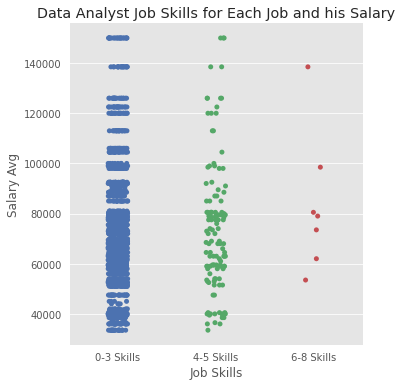

In [ ]:
plt.figure(figsize=(10,10))
labels=['0-3 Skills','4-5 Skills','6-8 Skills']
ax1=sns.catplot(x="DA_Skills_rate", y="Salary_Avg", data=DA_Jobs)
ax1.set_xticklabels(labels, minor=False)
plt.title("Data Analyst Job Skills for Each Job and his Salary")
plt.xlabel("job skills".title())
plt.ylabel("Salary Avg")
plt.show()


In [ ]:
major_keywords = {'computer-science','data-science','information-systems','business-administration','math'}

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = major_keywords.intersection(Description_words) #returns a set that contains the similarity between Description_words and skills_keywords 
    return ' '.join( match_words)

#function match 2 words
def split_line(in_line):
    line_sp = in_line.split(" ")
    line_two = ["-".join(line_sp[i:i + 2]) for i in range(0, len(line_sp), 2)]
    match_word = major_keywords.intersection(line_two)
    return ' '.join( match_word)

DA_Jobs['DA_Major'] =  DA_Jobs["Job Description"].apply(word_finder) #creat new columns have skills keywords
DA_Jobs['DA_Major'] = DA_Jobs['DA_Major'] +" "+ DA_Jobs["Job Description"].apply(split_line) 

DA_Jobs.head(3)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg,Regions,min_unit,Revenue-Range,DA_Skills_rate,DA_Major
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0,NY,million,"(50.0, 100.0] million","(0, 3]",
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,10000.0,2.0,5.0,51500.0,NY,billion,"(0.0, 10.0] billion","(3, 5]",
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql,37000,66000,1001,5000.0,NaN,NaN,51500.0,NY,Unknown,nan Unknown,"(0, 3]",


In [ ]:
count_majors= pd.Series(' '.join(DA_Jobs['DA_Major']).split(" ")).value_counts()#new series that count every skills 
count_majors

                           3433
computer-science            116
data-science                 84
information-systems          30
math                         24
business-administration       7
dtype: int64

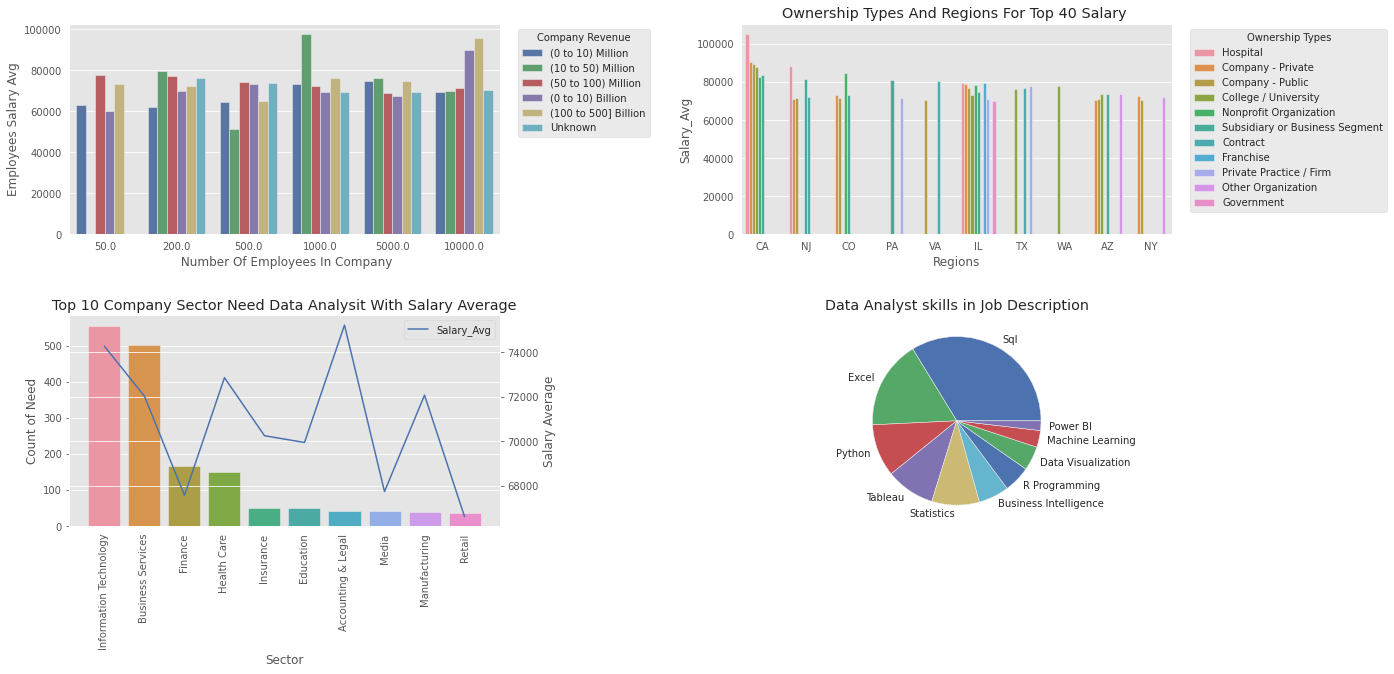

In [ ]:
fig = plt.figure(figsize=(20,10))

#  subplot #1
plt.subplot(221)
labels=['(0 to 10) Million', '(10 to 50) Million','(50 to 100) Million','(0 to 10) Billion','(100 to 500] Billion', 'Unknown']
ax=sns.barplot(
    data=DA_Jobs,
     x="max_Size",
     y="Salary_Avg",
     hue="Revenue-Range",
     ci=None,
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="company Revenue".title(),loc='upper left',bbox_to_anchor= (1.03, 1))
ax.set_ylabel("employees Salary Avg".title())
ax.set_xlabel(" number of employees in Company".title())
fig.tight_layout(pad=3.0)



#  subplot #2
plt.subplot(222)
data=DA_Jobs.groupby(["Regions","Type of ownership"]).agg({'Salary_Avg':'mean'}).reset_index()
#data=DA_Jobs.groupby(["Regions","Type of ownership"]).mean()["Salary_Avg"].reset_index()
data=data.sort_values("Salary_Avg",ascending=False).iloc[:40]
scatter=sns.barplot(
    data=data,
     x="Regions",
     y="Salary_Avg",
     hue="Type of ownership",    
)
scatter.legend(bbox_to_anchor= (1.03, 1),
               title="ownership Types".title(),)
plt.title("ownership types and Regions for top 40 Salary ".title())
fig.tight_layout(pad=3.0)


#  subplot #3
plt.subplot(223)
ax = sns.barplot(x='Sector', y='Counts', data=sector_DFt)
plt.ylabel('Count of Need')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), sector_DFt.Salary_Avg,label="Salary_Avg")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("top 10 company sector need data analysit with Salary Average".title())
plt.ylabel('Salary Average')
plt.legend()
fig.tight_layout(pad=3.0)

#  subplot #4
plt.subplot(224)
                    
labels = ['Sql','Excel','Python', 'Tableau', 'Statistics','Business Intelligence','R Programming ','Data Visualization ','Machine Learning',
          'Power BI ']
count_skills.plot.pie(title="Data Analyst skills in Job Description",labels=labels)
plt.ylabel(' ')

plt.show()

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.color_palette("deep")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
from matplotlib import style
plt.style.use('ggplot')
import sqlite3
import requests
from wordcloud import WordCloud
plt.style.use('seaborn-deep')


In [ ]:
#read data from csv file
DA_Jobs= pd.read_csv("/content/DataAnalyst.csv")

In [ ]:
#show first 5 rows 
DA_Jobs.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
#count null values in each columns
DA_Jobs.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [ ]:
#replace -1 to null
DA_Jobs=DA_Jobs.replace(["-1",-1,"Unknown"],np.NaN)

In [ ]:
DA_Jobs.isnull().sum()

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  205
Founded               660
Type of ownership     179
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [ ]:


#drop columns that have a lot of null and we not need it.
DA_Jobs=DA_Jobs.drop(["Easy Apply","Competitors","Founded"],axis=1)

In [ ]:
#drop row with null values
DA_Jobs=DA_Jobs.dropna()
#number of rows and columns
DA_Jobs.shape

(1844, 13)

In [ ]:
#columns information
DA_Jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1844 non-null   int64  
 1   Job Title          1844 non-null   object 
 2   Salary Estimate    1844 non-null   object 
 3   Job Description    1844 non-null   object 
 4   Rating             1844 non-null   float64
 5   Company Name       1844 non-null   object 
 6   Location           1844 non-null   object 
 7   Headquarters       1844 non-null   object 
 8   Size               1844 non-null   object 
 9   Type of ownership  1844 non-null   object 
 10  Industry           1844 non-null   object 
 11  Sector             1844 non-null   object 
 12  Revenue            1844 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 201.7+ KB


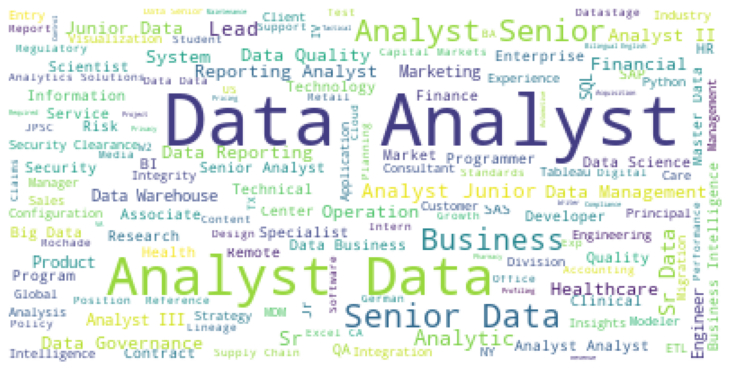

In [ ]:
plt.figure(figsize=(10,10))
positions_text = " ".join(DA_Jobs['Job Title'].to_list())
wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white").generate(positions_text)
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
#top 150 frequent keywords in job title

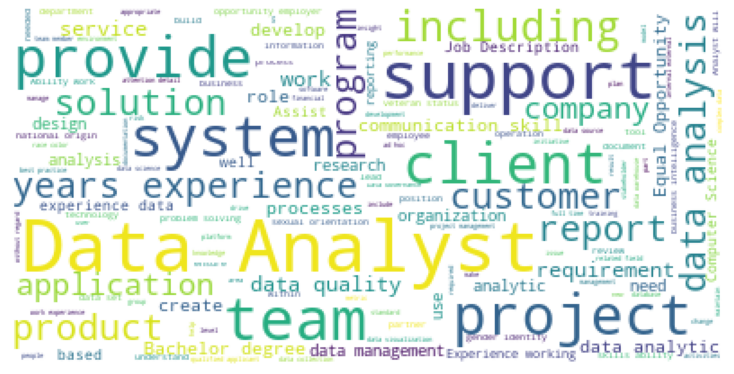

In [ ]:
plt.figure(figsize=(10,10))
positions_text = " ".join(DA_Jobs['Job Description'].to_list())
wordcloud = WordCloud(max_font_size=40, max_words=150, background_color="white").generate(positions_text)
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
#top 150 frequent keywords in Job Description

In [ ]:
#convert all text to lowercase
DA_Jobs["Job Description"]= DA_Jobs["Job Description"].str.lower()

In [ ]:
#set with some keywords skills
skills_keywords = {'python','r','sql','excel','tableau','power-bi',
             'statistics','machine-learning', 'data-visualization','business-intelligence'}

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = skills_keywords.intersection(Description_words) #returns a set that contains the similarity between Description_words and skills_keywords 
    return ' '.join( match_words)
   
def split_line(in_line):
    line_sp = in_line.split(" ")
    line_two = ["-".join(line_sp[i:i + 2]) for i in range(0, len(line_sp), 2)]
    match_word = skills_keywords.intersection(line_two)
    return ' '.join( match_word)

DA_Jobs['DA_Skills'] =  DA_Jobs["Job Description"].apply(word_finder) #creat new columns have skills keywords
DA_Jobs['DA_Skills'] = DA_Jobs['DA_Skills'] +" "+ DA_Jobs["Job Description"].apply(split_line) 

DA_Jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql


In [ ]:

count_skills= pd.Series(' '.join(DA_Jobs['DA_Skills']).split(" ")).value_counts()#new series that count every skills 
count_skills=count_skills.drop([''], axis=0)
count_skills

sql                      714
excel                    360
python                   213
tableau                  199
statistics               193
business-intelligence    124
r                        108
data-visualization        98
machine-learning          68
power-bi                  39
dtype: int64

Text(0, 0.5, ' ')

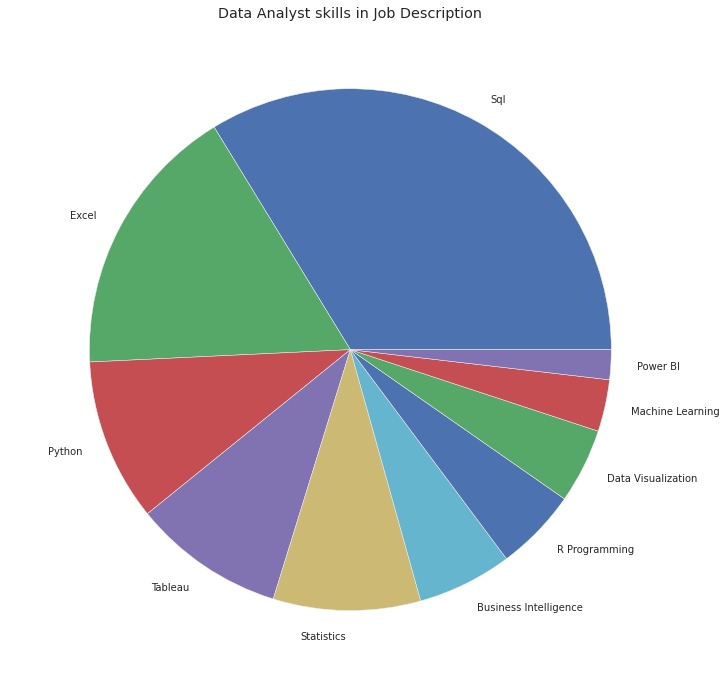

In [ ]:
plt.figure(figsize=(12,12))
                    
labels = ['Sql','Excel','Python', 'Tableau', 'Statistics','Business Intelligence','R Programming ','Data Visualization ','Machine Learning',
          'Power BI ']# list of skills name
count_skills.plot.pie(title="Data Analyst skills in Job Description",labels=labels) # plot pie chart with skills name
plt.ylabel(' ')


In [ ]:
DA_Jobs[['min_Salary','max_Salary']] = DA_Jobs["Salary Estimate"].str.split("-",expand=True,)#split range of salary to minimums and maxmums

DA_Jobs['min_Salary']=DA_Jobs['min_Salary'].str.extract('(\d+)') #extract the number only
DA_Jobs['max_Salary']=DA_Jobs['max_Salary'].str.extract('(\d+)')

DA_Jobs["min_Salary"] = pd.to_numeric(DA_Jobs["min_Salary"])*1000 #convert to number then convert salarys to thousand 
DA_Jobs["max_Salary"] = pd.to_numeric(DA_Jobs["max_Salary"])*1000

DA_Jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql,37000,66000


In [ ]:
DA_Jobs[['min_Size','max_Size']] = DA_Jobs["Size"].str.split("to",expand=True,) #split range of size company to minimums and maxmums

DA_Jobs['min_Size']=DA_Jobs['min_Size'].str.extract('(\d+)') #extract the number only
DA_Jobs['max_Size']=DA_Jobs['max_Size'].str.extract('(\d+)')

DA_Jobs['min_Size']=pd.to_numeric(DA_Jobs['min_Size']) #convert to number
DA_Jobs['max_Size']=pd.to_numeric(DA_Jobs['max_Size'])

DA_Jobs[['min_Revenue','max_Revenue']] = DA_Jobs["Revenue"].str.split("to",expand=True,)#split range of revenue of company to minimums and maxmums

DA_Jobs['min_Revenue']= DA_Jobs['min_Revenue'].str.extract('(\d+)')#extract the number only
DA_Jobs['max_Revenue']= DA_Jobs['max_Revenue'].str.extract('(\d+)')

DA_Jobs['min_Revenue']= pd.to_numeric(DA_Jobs['min_Revenue']) #convert to number
DA_Jobs['max_Revenue']= pd.to_numeric(DA_Jobs['max_Revenue'])

In [ ]:
DA_Jobs["Salary_Avg"]=((DA_Jobs["min_Salary"]+DA_Jobs["max_Salary"])/2)
DA_Jobs.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,NaN,2.0,5.0,51500.0


In [ ]:
sector_DFt=pd.DataFrame()
sector_DFt=DA_Jobs[["Sector","Salary_Avg"]].copy().reset_index()# copy the columns from DA_Jobs 
sector_DFt['Counts'] = sector_DFt.groupby(['Sector'])['Salary_Avg'].transform('count') 
sector_DFt=sector_DFt.groupby('Sector').agg({'Salary_Avg':'mean','Counts':'mean'})# calculate mean for salary_avg and count
sector_DFt=sector_DFt.sort_values("Counts",ascending=False).iloc[:10] # top 10 of sector
sector_DFt['Sector'] = sector_DFt.index

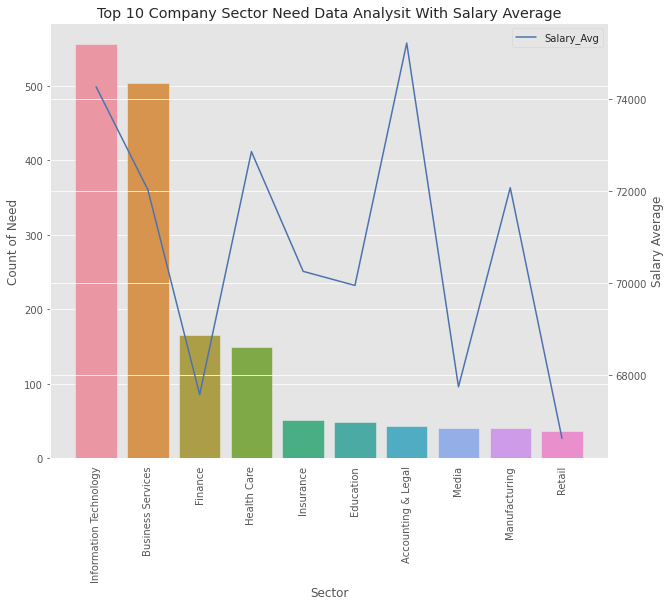

In [ ]:
plt.figure(figsize =(10,8))
ax = sns.barplot(x='Sector', y='Counts', data=sector_DFt)
plt.ylabel('Count of Need')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), sector_DFt.Salary_Avg,label="Salary_Avg")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("top 10 company sector need data analysit with Salary Average".title())
plt.ylabel('Salary Average')
plt.legend()
#plt.xticks(rotation=50)
plt.show()

In [ ]:
DA_Jobs['Regions'] = DA_Jobs["Location"].str[-2:]#take ragions code from location columns 


In [ ]:
DA_Jobs.loc[DA_Jobs['max_Size'].isnull(),'max_Size'] = DA_Jobs['min_Size']# if there no max size take from min_size


Text(0.5, 1.0, 'Ownership Types And Regions For Top 40 Salary ')

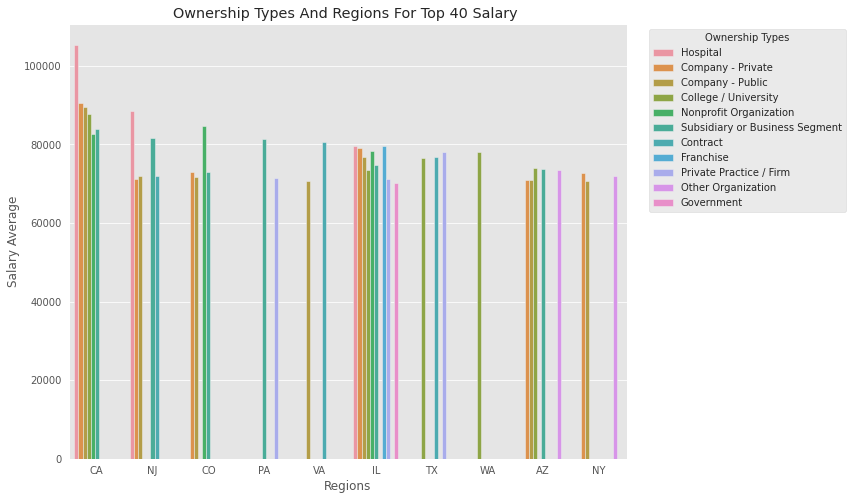

In [ ]:
plt.figure(figsize=(10,8))
data=DA_Jobs.groupby(["Regions","Type of ownership"]).agg({'Salary_Avg':'mean'}).reset_index()# new datafame with mean Salary_Avg
data=data.sort_values("Salary_Avg",ascending=False).iloc[:40]# top 40 Type of ownership have high Salary_Avg


scatter=sns.barplot(
    data=data,
     x="Regions",
     y="Salary_Avg",
     hue="Type of ownership",    
)
scatter.legend(bbox_to_anchor= (1.03, 1),
               title="ownership Types".title(),)
plt.ylabel("Salary Average")
plt.title("ownership types and Regions for top 40 Salary ".title())


In [ ]:
Revenue_units = {'billion','million',"Unknown"} # set of units of Revenue company

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = Revenue_units.intersection(Description_words)#returns a set that contains the similarity between Description_words and skills_keywords
    for x in match_words:
      return x

DA_Jobs['min_unit'] = DA_Jobs["Revenue"].apply(word_finder) #creat new columns have skills keywords



In [ ]:
DA_Jobs['Revenue-Range'] = pd.cut(x=DA_Jobs['min_Revenue'], bins=[0,10,50,100,500])#categorie min_Revenue 
DA_Jobs['Revenue-Range']= DA_Jobs['Revenue-Range'].astype(str) +" "+ DA_Jobs['min_unit']#to save unit with Revenue-Range


Text(0.5, 1.0, 'The Relation Between Number Of Employees And Salary Average In The Companys')

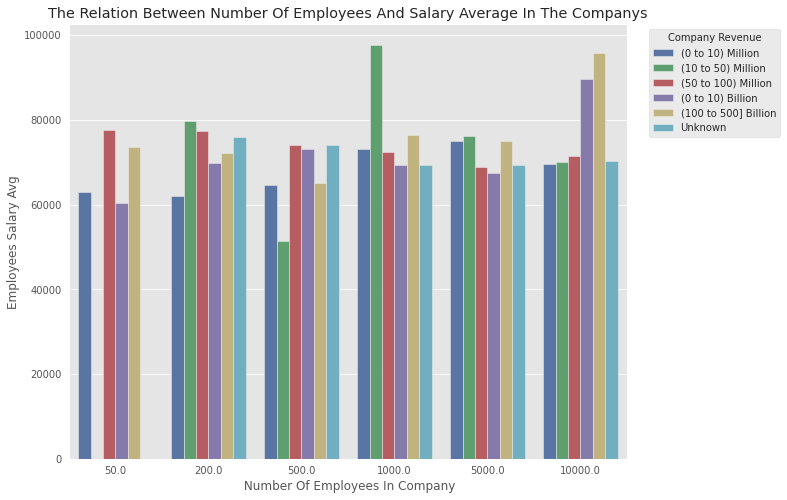

In [ ]:
plt.figure(figsize=(10,8))
labels=['(0 to 10) Million', '(10 to 50) Million','(50 to 100) Million','(0 to 10) Billion','(100 to 500] Billion', 'Unknown'] #name of labels for chart

ax=sns.barplot(
    data=DA_Jobs,
     x="max_Size",
     y="Salary_Avg",
     hue="Revenue-Range",
     ci=None,
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="company Revenue".title(),loc='upper left',bbox_to_anchor= (1.03, 1))
ax.set_ylabel("employees Salary Avg".title())
ax.set_xlabel(" number of employees in Company".title())
ax.set_title("the relation between number of employees and Salary Average in the companys".title())

In [ ]:
# count number of skills and save it in DA_Skills_rate
list_text = list(DA_Jobs['DA_Skills'].str.split(" "))
DA_Jobs['DA_Skills_rate']=list_text
DA_Jobs

#count number of skills inside evry row
for index, item in enumerate(list_text):
  list_text[index]=len(item)

DA_Jobs['DA_Skills_rate']=list_text
DA_Jobs.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg,Regions,min_unit,Revenue-Range,DA_Skills_rate
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0,NY,million,"(50.0, 100.0] million",3
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,10000.0,2.0,5.0,51500.0,NY,billion,"(0.0, 10.0] billion",4


In [ ]:
DA_Jobs['DA_Skills_rate'].unique()

array([3, 4, 2, 5, 6])

In [ ]:
DA_Jobs['DA_Skills_rate'] = pd.cut(x=DA_Jobs['DA_Skills_rate'], bins=[0,3,5,8])#categorie DA_Skills_rate


<Figure size 720x720 with 0 Axes>

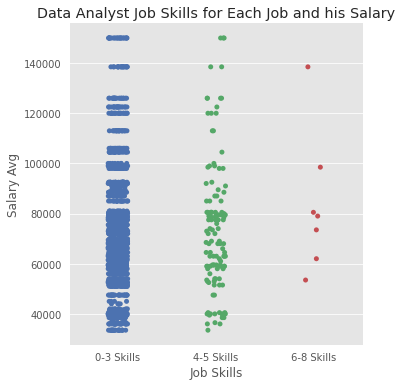

In [ ]:
plt.figure(figsize=(10,10))
labels=['0-3 Skills','4-5 Skills','6-8 Skills']
ax1=sns.catplot(x="DA_Skills_rate", y="Salary_Avg", data=DA_Jobs)
ax1.set_xticklabels(labels, minor=False)
plt.title("Data Analyst Job Skills for Each Job and his Salary")
plt.xlabel("job skills".title())
plt.ylabel("Salary Avg")
plt.show()


In [ ]:
major_keywords = {'computer-science','data-science','information-systems','business-administration','math'}

#function match words
def word_finder(Description_data):
    Description_words = set(Description_data.split(' ')) #split every single word and save as set
    match_words = major_keywords.intersection(Description_words) #returns a set that contains the similarity between Description_words and skills_keywords 
    return ' '.join( match_words)

#function match 2 words
def split_line(in_line):
    line_sp = in_line.split(" ")
    line_two = ["-".join(line_sp[i:i + 2]) for i in range(0, len(line_sp), 2)]
    match_word = major_keywords.intersection(line_two)
    return ' '.join( match_word)

DA_Jobs['DA_Major'] =  DA_Jobs["Job Description"].apply(word_finder) #creat new columns have skills keywords
DA_Jobs['DA_Major'] = DA_Jobs['DA_Major'] +" "+ DA_Jobs["Job Description"].apply(split_line) 

DA_Jobs.head(3)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,DA_Skills,min_Salary,max_Salary,min_Size,max_Size,min_Revenue,max_Revenue,Salary_Avg,Regions,min_unit,Revenue-Range,DA_Skills_rate,DA_Major
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),statistics python,37000,66000,201,500.0,100.0,500.0,51500.0,NY,million,"(50.0, 100.0] million","(0, 3]",
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),overview\n\nprovides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),excel sql statistics business-intelligence,37000,66000,10000,10000.0,2.0,5.0,51500.0,NY,billion,"(0.0, 10.0] billion","(3, 5]",
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),we’re looking for a senior data analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,excel sql,37000,66000,1001,5000.0,NaN,NaN,51500.0,NY,Unknown,nan Unknown,"(0, 3]",


In [ ]:
count_majors= pd.Series(' '.join(DA_Jobs['DA_Major']).split(" ")).value_counts()#new series that count every skills 
count_majors

                           3433
computer-science            116
data-science                 84
information-systems          30
math                         24
business-administration       7
dtype: int64

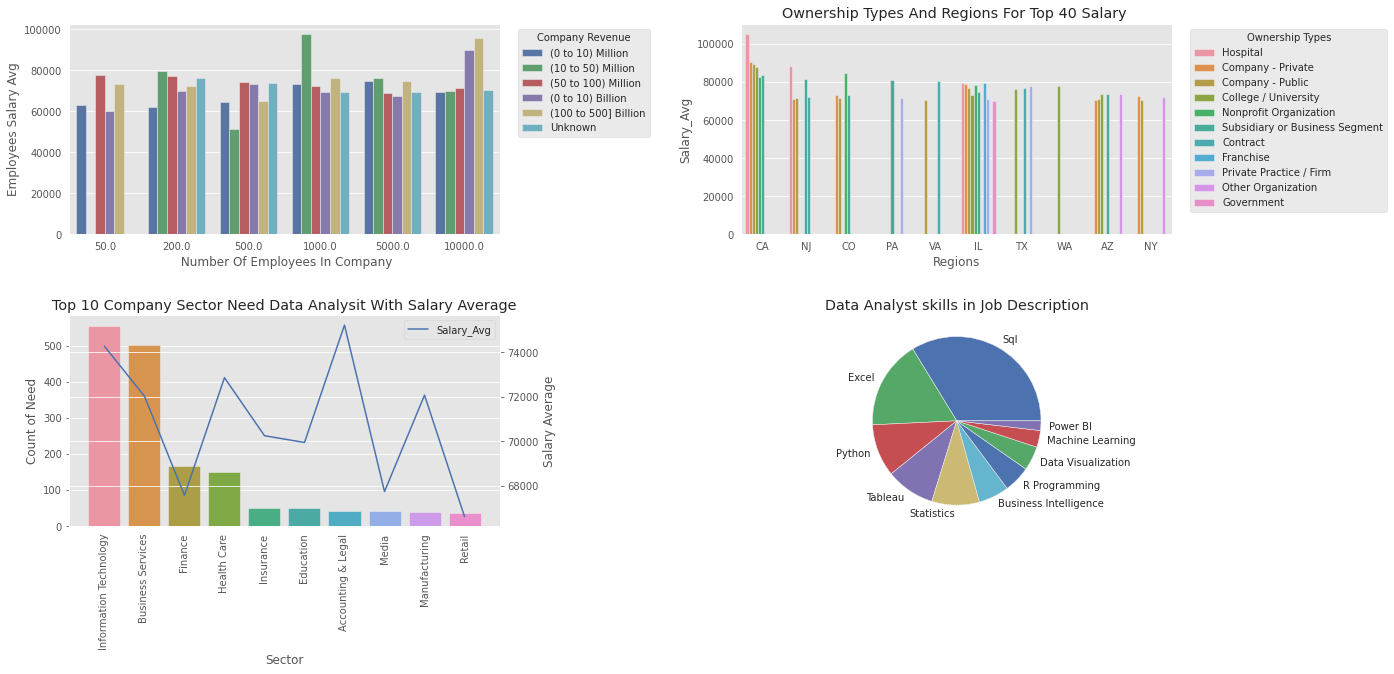

In [ ]:
fig = plt.figure(figsize=(20,10))

#  subplot #1
plt.subplot(221)
labels=['(0 to 10) Million', '(10 to 50) Million','(50 to 100) Million','(0 to 10) Billion','(100 to 500] Billion', 'Unknown']
ax=sns.barplot(
    data=DA_Jobs,
     x="max_Size",
     y="Salary_Avg",
     hue="Revenue-Range",
     ci=None,
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="company Revenue".title(),loc='upper left',bbox_to_anchor= (1.03, 1))
ax.set_ylabel("employees Salary Avg".title())
ax.set_xlabel(" number of employees in Company".title())
fig.tight_layout(pad=3.0)



#  subplot #2
plt.subplot(222)
data=DA_Jobs.groupby(["Regions","Type of ownership"]).agg({'Salary_Avg':'mean'}).reset_index()
#data=DA_Jobs.groupby(["Regions","Type of ownership"]).mean()["Salary_Avg"].reset_index()
data=data.sort_values("Salary_Avg",ascending=False).iloc[:40]
scatter=sns.barplot(
    data=data,
     x="Regions",
     y="Salary_Avg",
     hue="Type of ownership",    
)
scatter.legend(bbox_to_anchor= (1.03, 1),
               title="ownership Types".title(),)
plt.title("ownership types and Regions for top 40 Salary ".title())
fig.tight_layout(pad=3.0)


#  subplot #3
plt.subplot(223)
ax = sns.barplot(x='Sector', y='Counts', data=sector_DFt)
plt.ylabel('Count of Need')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), sector_DFt.Salary_Avg,label="Salary_Avg")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("top 10 company sector need data analysit with Salary Average".title())
plt.ylabel('Salary Average')
plt.legend()
fig.tight_layout(pad=3.0)

#  subplot #4
plt.subplot(224)
                    
labels = ['Sql','Excel','Python', 'Tableau', 'Statistics','Business Intelligence','R Programming ','Data Visualization ','Machine Learning',
          'Power BI ']
count_skills.plot.pie(title="Data Analyst skills in Job Description",labels=labels)
plt.ylabel(' ')

plt.show()